# Difração de Elétrons

O primeiro passo é inserir os dados das medições em seus devidos vetores ou matrizes e calcular a média dos raios e seus erros.

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set_theme()

V = [2200., 2500., 2800., 3100., 3400., 3700., 4000., 4300., 4300., 4000., 3700., 3400., 3100., 2800., 2500.] # valores de tensão medidos
eV = 100.0 # Erro na tensão
rint = [[13.75e-3, 13.85e-3],[14.65e-3, 15.10e-3],[13.95e-3, 14.20e-3],[13.3e-3, 14.7e-3],[11.65e-3, 12.7e-3],[12.0e-3, 12.55e-3],[11.5e-3, 12.55e-3],[11.0e-3, 11.9e-3],
        [11.4e-3, 12.2e-3],[11.1e-3, 12.45e-3], [11.7e-3, 12.55e-3], [12.06e-3, 13.35e-3], [11.45e-3, 12.1e-3], [11.5e-3, 11.7e-3], [11.9e-3, 12.3e-3]] # raios dos anéis internos (coluna 1 = interior, coluna 2 = exterior dos anéis)
rext = [[26.9e-3, 27.0e-3],[24.9e-3, 26.0e-3],[25.9e-3, 26.95e-3],[23.0e-3, 24.9e-3],[21.7e-3, 23.05e-3],[19.1e-3, 21.2e-3], [19.4e-3, 21.2e-3],[19.7e-3, 22.15e-3],
        [19.6e-3, 21.8e-3],[20.25e-3, 22.95e-3],[21.35e-3, 22.2e-3], [22.0e-3, 23.2e-3], [21.3e-3, 22.95e-3], [22.1e-3, 23.05e-3], [22.15e-3, 23.8e-3]] # raios dos anéis externos (coluna 1 = interior, coluna 2 = exterior dos anéis)

# Calcula os raios médios e seus erros
rintm = (np.array([(rint[i][1] + rint[i][0])/2.0 for i in range(len(rint))])).reshape(-1,1)
errint = (np.array([np.abs(rint[i][1] - rint[i][0])/2.0 for i in range(len(rint))])).reshape(-1,1)
rextm = (np.array([(rext[i][1] + rext[i][0])/2.0 for i in range(len(rext))])).reshape(-1,1)
errext = (np.array([np.abs(rext[i][1] - rext[i][0])/2.0 for i in range(len(rext))])).reshape(-1,1)

O próximo passo é plotar os gráficos de $r \times \frac{1}{\sqrt{V}}$ e $\lambda \times \frac{1}{\sqrt{V}}$. Devemos obter

\begin{equation}
r = \frac{a_r}{\sqrt{V}}
\end{equation}

para o primeiro e

\begin{equation}
\lambda = \frac{a_\lambda}{\sqrt{V}}
\end{equation}

para o segundo.

Pra o primeiro utilizaremos a constante de Planck já conhecida e vamos obter a distância entre os planos do grafite por fittagem, enquanto para o segundo utilizaremos a distância entre planos conhecida na literatura para calcular o comprimento de onda de Bragg e, assumindo que é o mesmo que o comprimento de onda de de Broglie, vamos obter constante de Planck por fittagem.

Para o segundo caso, precisamos utilizar:

\begin{equation}
\lambda = \frac{d r}{n D},
\end{equation}

E, portanto, o erro propagado será:

\begin{align}
\Delta \lambda & = \sqrt{\left|\frac{\partial \lambda}{r}\right|^2 (\Delta r)^2 + \left|\frac{\partial \lambda}{D}\right|^2 (\Delta D)^2}, \\
\Delta \lambda & = \sqrt{\left(\frac{d}{n D}\right)^2 (\Delta r)^2 + \left(\frac{d r}{n D^2}\right)^2 (\Delta D)^2}, \\
\Delta \lambda & = \frac{d}{n D}\sqrt{(\Delta r)^2 + \left(\frac{r}{D}\right)^2 (\Delta D)^2}.
\end{align}

Depois de fitarmos, vamos obter os coeficientes de inclinação das retas. Para o primeiro fit, essa inclinação é dada por:

\begin{equation}
a_{r} = \frac{n h D}{d \sqrt{2 m e}}.
\end{equation}

Isolando $d$, temos que:

\begin{equation}
d = \frac{n h D}{a_{r} \sqrt{2 m e}}.
\end{equation}

Naturalmente, o erro dependerá apenas do erro em $D$, isto é,

\begin{equation}
\Delta d = \frac{n h}{a_{r} \sqrt{2 m e}} \Delta D.
\end{equation}

No caso do segundo fit, temos que:

\begin{equation}
a_{\lambda} = \frac{h}{\sqrt{2 m e}}.
\end{equation}

Isolando $h$, ficamos com:

\begin{equation}
h = a_{\lambda} \sqrt{2 m e}.
\end{equation}

Para os anéis internos, a distância entre câmadas da grade de grafite é d = 4.285 \pm 0.069 A, e a constante de planck é 3.294 x 10^-34 m^2 kg/s
Cujas discrepâncias para os valores reais são: delta d1 = 101.18 por cento e delta h1 = 50.29 por cento

Se dividirmos d e multiplicarmos h por 2, a distância entre câmadas da grade de grafite é d = 2.143 \pm 0.034 A, e a constante de planck é 6.587 x 10^-34 m^2 kg/s
Cujas discrepâncias para os valores reais são: delta d1 = 0.59 por cento e delta h1 = 0.59 por cento

Para os anéis externos, a distância entre câmadas da grade de grafite é d = 1.604 \pm 0.026 A, e a constante de planck é 5.081 x 10^-34 m^2 kg/s
Cujas discrepâncias para os valores reais são: delta d2 = 30.40 por cento e delta h2 = 23.32 por cento



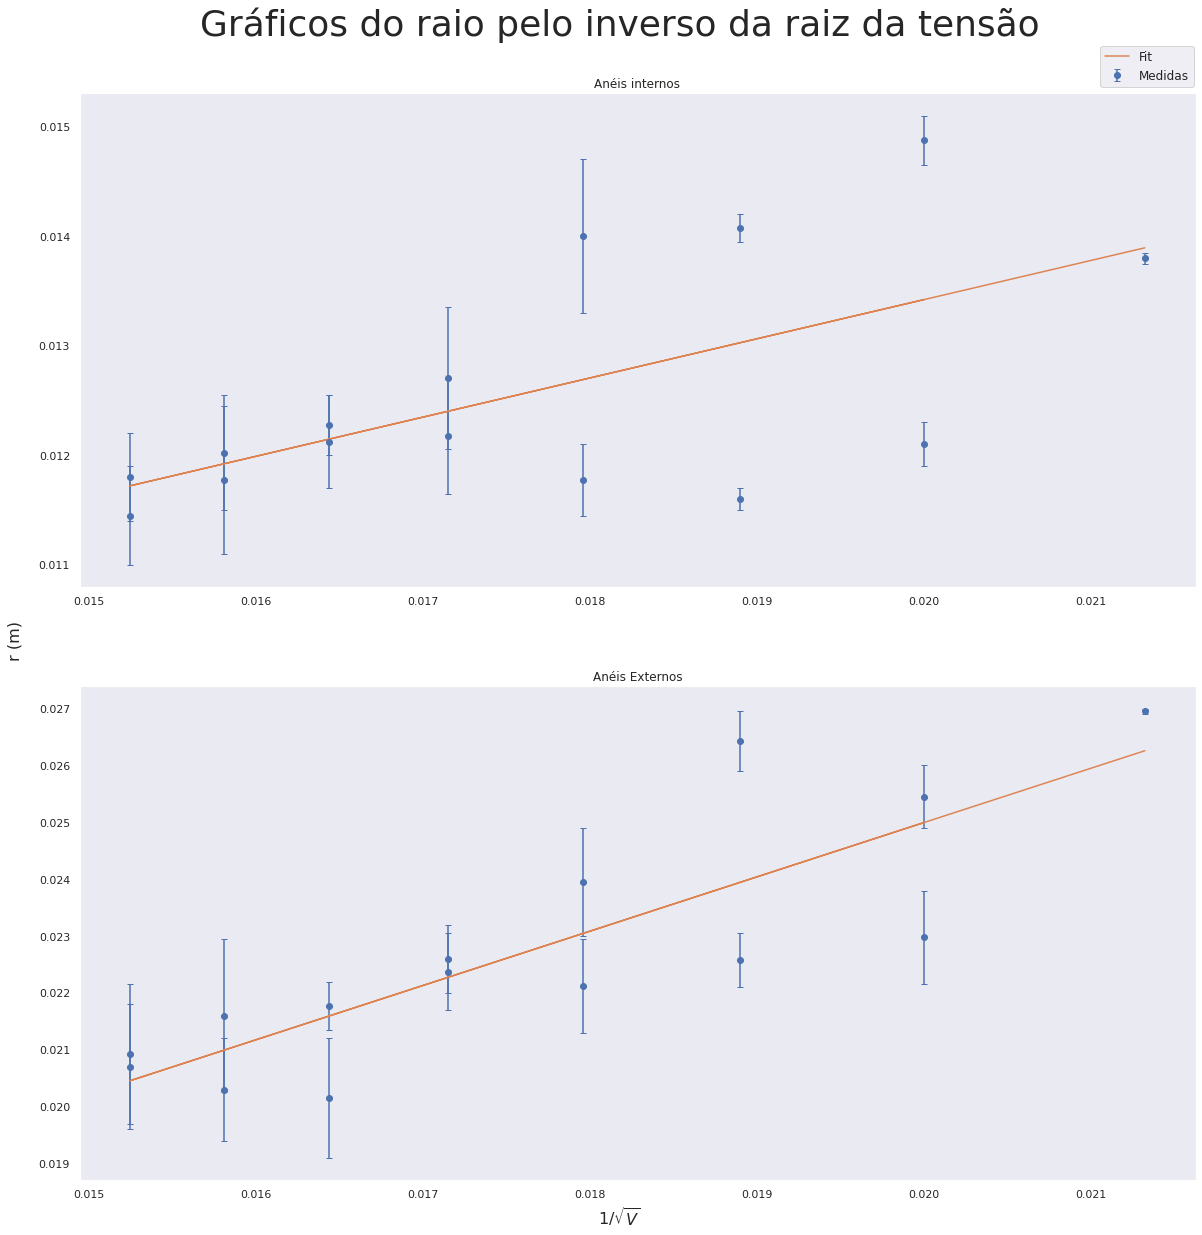

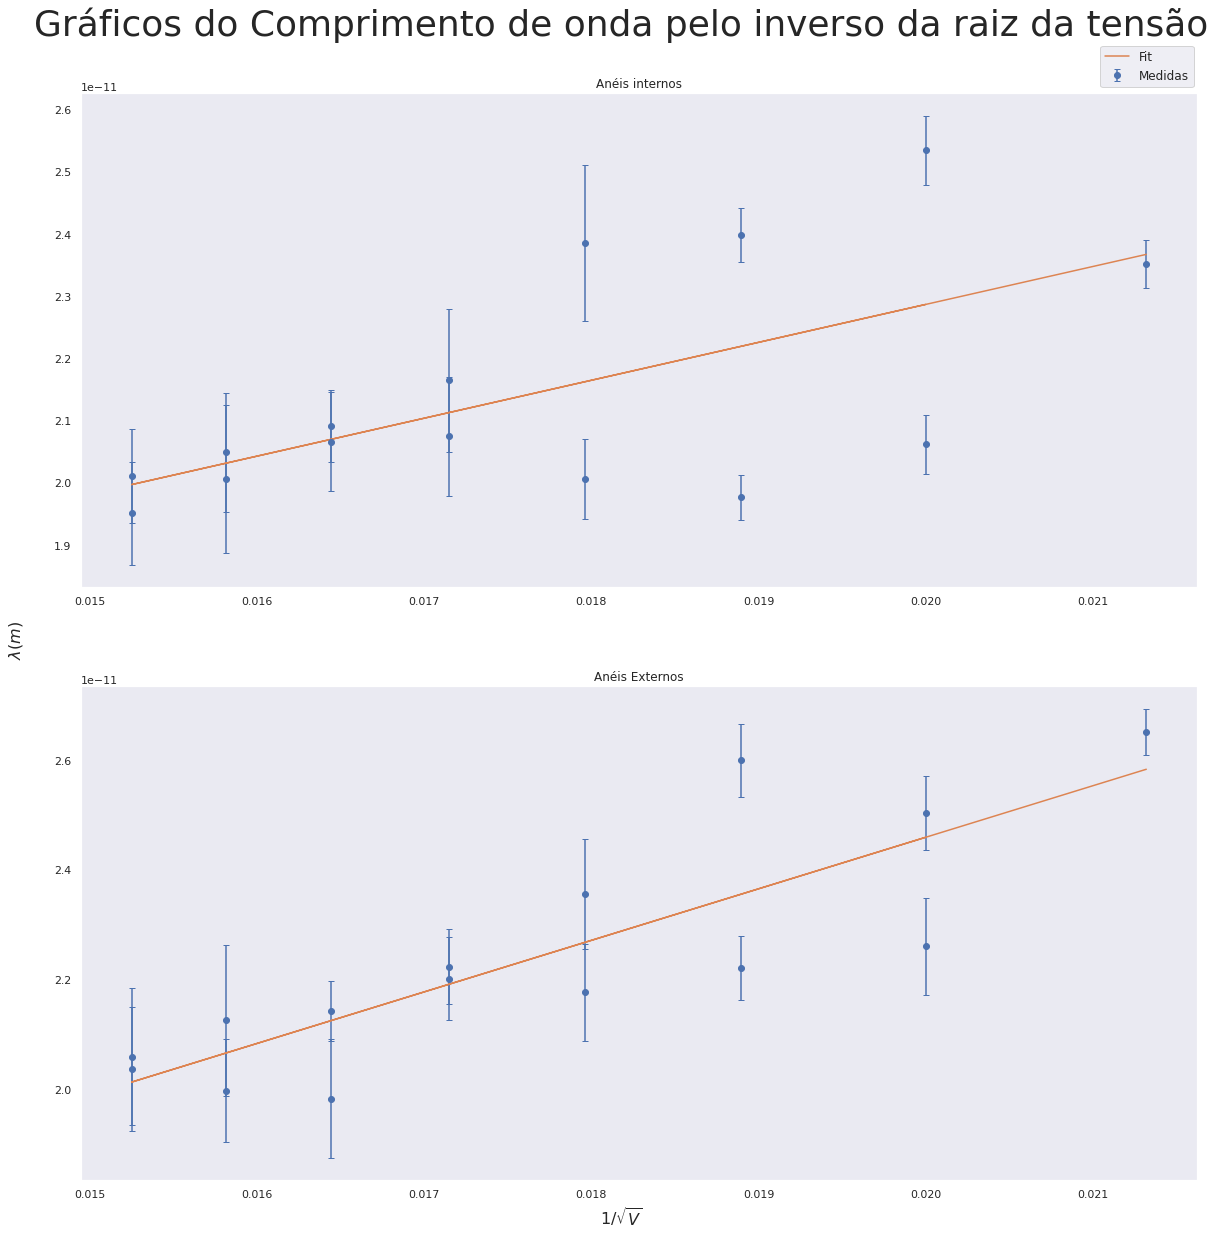

In [ ]:
hreal = 6.62607015e-34 # constante de Planck
e = 1.60217663e-19 # carga do elétron
m = 9.1093837e-31 # Massa do elétron
d1real = 2.13e-10 # distância entre as camadas para o plano 1
d2real = 1.23e-10 # distância entre as camadas pra o plano 2
D = 125.0e-3 # distância da grade até a tela
eD = 2.0e-3 # erro em D

x = (np.array([1.0/np.sqrt(j) for j in V])).reshape(-1,1) # calcula o 1/raiz(V)
lmb1 = (np.array([d1real*j/D for j in rintm])).reshape(-1,1) # calcula os lambda pra n = 1
errl1 = (np.array([(d1real/D)*np.sqrt(errint[j]**2 + ((rintm[j]/D)*eD)**2) for j in range(len(rintm))])).reshape(-1,1) # erro propagado nos lambda 1
lmb12 = 0.5*lmb1 # Se o anel 1 for com n = 2
errl12 = 0.5*errl1 # Se o anel 1 for com n = 2
lmb2 = (np.array([d2real*j/D for j in rextm])).reshape(-1,1) # calcula os lambda pra n = 2
errl2 = (np.array([(d2real/D)*np.sqrt(errext[j]**2 + ((rextm[j]/D)*eD)**2) for j in range(len(rextm))])).reshape(-1,1) # erro propagado nos lambda 2

rintfit = linear_model.LinearRegression(fit_intercept=True) # rinterno que vai ser fitado
rextfit = linear_model.LinearRegression(fit_intercept=True) # rexterno fit
lmb1fit = linear_model.LinearRegression(fit_intercept=True) # lambda 1fit
lmb2fit = linear_model.LinearRegression(fit_intercept=True) # lambda 2 fit

rintfit.fit(x,rintm)
rextfit.fit(x,rextm)
lmb1fit.fit(x,lmb1)
lmb2fit.fit(x,lmb2)

rintpred = rintfit.predict(x)
rextpred = rextfit.predict(x)
lmb1pred = lmb1fit.predict(x)
lmb2pred = lmb2fit.predict(x)

# Erro quadrático médio de cada predição anterior
errintf = np.sqrt(mean_squared_error(rintm,rintpred))
errextf = np.sqrt(mean_squared_error(rextm,rextpred))
erlmb1f = np.sqrt(mean_squared_error(lmb1,lmb1pred))
erlmb2f = np.sqrt(mean_squared_error(lmb2,lmb2pred))

arint = rintfit.coef_ # inclinação da reta rint fittada
d1 = hreal*D/(arint*np.sqrt(2.0*m*e))
ed1 = hreal*eD/(arint*np.sqrt(2.0*m*e))

almb1 = lmb1fit.coef_ # inclinação da reta lambda n = 1 fittada
h1 = almb1*np.sqrt(2.0*m*e)

print('Para os anéis internos, a distância entre câmadas da grade de grafite é d = %.3f \pm %.3f A, e a constante de planck é %.3f x 10^-34 m^2 kg/s'%(d1*1.0e10, ed1*1.0e10, h1*1.0e34))
print('Cujas discrepâncias para os valores reais são: delta d1 = %.2f por cento e delta h1 = %.2f por cento'%(100.0*np.abs(d1-d1real)/d1real, 100.0*np.abs(h1-hreal)/hreal))
print('')

print('Se dividirmos d e multiplicarmos h por 2, a distância entre câmadas da grade de grafite é d = %.3f \pm %.3f A, e a constante de planck é %.3f x 10^-34 m^2 kg/s'%((d1/2.)*1.0e10, (ed1/2.)*1.0e10, 2.0*h1*1.0e34))
print('Cujas discrepâncias para os valores reais são: delta d1 = %.2f por cento e delta h1 = %.2f por cento'%(100.0*np.abs(d1/2.0-d1real)/d1real, 100.0*np.abs(2.0*h1-hreal)/hreal))
print('')

arext = rextfit.coef_ # inclinação da rext
d2 = hreal*D/(arext*np.sqrt(2.0*m*e))
ed2 = hreal*eD/(arext*np.sqrt(2.0*m*e))

almb2 = lmb2fit.coef_ # inclinação da lambda 2
h2 = almb2*np.sqrt(2.0*m*e)

print('Para os anéis externos, a distância entre câmadas da grade de grafite é d = %.3f \pm %.3f A, e a constante de planck é %.3f x 10^-34 m^2 kg/s'%(d2*1.0e10, ed2*1.0e10, h2*1.0e34))
print('Cujas discrepâncias para os valores reais são: delta d2 = %.2f por cento e delta h2 = %.2f por cento'%(100.0*np.abs(d2-d2real)/d2real, 100.0*np.abs(h2-hreal)/hreal))
print('')

fig1, axs = plt.subplots(nrows=2, ncols=1) # figsize=(15,25)
fig1.set_figwidth(20)
fig1.set_figheight(20)
fig1.suptitle('Gráficos do raio pelo inverso da raiz da tensão', y=0.94, fontsize=36)

ax = axs[0]
ax.errorbar(np.reshape(x,len(x)), np.reshape(rintm, len(rintm)), yerr=np.reshape(errint, len(errint)), fmt='o', label='Medidas', capsize=3)
ax.plot(x, rintpred, label='Fit')
ax.set(title=("Anéis internos"))
ax.grid()

ax = axs[1]
ax.errorbar(np.reshape(x,len(x)), np.reshape(rextm,len(rextm)), yerr=np.reshape(errext,len(x)), fmt='o', label='Medidas', capsize=3)
ax.plot(x, rextpred, label='Fit')
ax.set(title=("Anéis Externos"))
ax.grid()

fig1.text(0.5, 0.1, '$1/\sqrt{V}$', ha='center', va='center',fontsize=16)
fig1.text(0.08, 0.5, 'r (m)', ha='center', va='center', rotation='vertical',fontsize=16)
handles, labels = ax.get_legend_handles_labels()
fig1.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.76, 0.83), fontsize=12)

fig2, axs2 = plt.subplots(nrows=2, ncols=1)
fig2.suptitle('Gráficos do Comprimento de onda pelo inverso da raiz da tensão', y=0.94, fontsize=36)

ax = axs2[0]
ax.errorbar(np.reshape(x,len(x)), np.reshape(lmb1,len(x)), yerr=np.reshape(errl1,len(x)), fmt='o', label='Medidas', capsize=3)
ax.plot(x, lmb1pred, label='Fit')
ax.set(title=("Anéis internos"))
ax.grid()

ax = axs2[1]
ax.errorbar(np.reshape(x,len(x)), np.reshape(lmb2,len(x)), yerr=np.reshape(errl2,len(x)), fmt='o', label='Medidas', capsize=3)
ax.plot(x, lmb2pred, label='Fit')
ax.set(title=("Anéis Externos"))
ax.grid()

fig2.text(0.5, 0.1, '$1/\sqrt{V}$', ha='center', va='center',fontsize=16)
fig2.text(0.08, 0.5, '$\lambda (m)$', ha='center', va='center', rotation='vertical',fontsize=16)
handles, labels = ax.get_legend_handles_labels()
fig2.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.76, 0.83), fontsize=12)
fig2.set_figwidth(20)
fig2.set_figheight(20)

plt.show()

por fim, vamos calcular o valor teórico dos comprimentos de onda, utilizando a constante de Planck real, e comparar com os comprimentos de onda de Bragg, calculados à partir dos $r$ medidos e $d$ real, como fizemos anteriormente. O erro propagado será:

\begin{align}
\Delta \lambda & = \left|\frac{\partial \lambda}{\partial V}\right| \Delta V, \\
\Delta \lambda & = \frac{h}{\sqrt{2meV^3}} \Delta V.
\end{align}

In [ ]:
lmbteo = [hreal/np.sqrt(2.0*m*e*j) for j in V]
errlteo = [hreal*eV/np.sqrt(2.0*m*e*(j**3)) for j in V]

deltalmb1 = [np.abs(lmbteo[i] - lmb1[i])/lmbteo[i] for i in range(len(lmbteo))]
deltalmb12 = [np.abs(lmbteo[i] - lmb12[i])/lmbteo[i] for i in range(len(lmbteo))]
deltalmb2 = [np.abs(lmbteo[i] - lmb2[i])/lmbteo[i] for i in range(len(lmbteo))]

print('Tabela de Comprimento de Ondas')
print('Tensão (V) | Comprimento de Onda Teórico (10^-1 A) | Comprimento de onda de Bragg anel 1 (10^-1 A) | Discrepância (por cento) | Comprimento de onda de Bragg anel 2 (10^-1 A) | Discrepância (por cento)')
for i in range(len(lmbteo)):
  print('')
  print(('%i | %.3f \pm %.3f | %.3f \pm %.3f | %.2f | %.3f \pm %.3f | %.2f'%(V[i],1.0e11*lmbteo[i],1.0e11*errlteo[i],1.0e11*lmb1[i],1.0e11*errl1[i],100.0*deltalmb1[i],1.0e11*lmb2[i],1.0e11*errl2[i],100.0*deltalmb2[i])).replace('.',','))
print('')

#print('Tabela de Comprimento de Ondas')
#print('Tensão (V) | Comprimento de Onda Teórico (10^-1 A) | Comprimento de onda de Bragg n = 1 (10^-1 A) | Discrepância (por cento) | Comprimento de onda de Bragg n = 2 (10^-1 A) | Discrepância (por cento)')
#for i in range(len(lmbteo)):
#  print('')
#  print(('%i | %.3f \pm %.3f | %.3f \pm %.3f | %.2f | %.3f \pm %.3f | %.2f'%(V[i],1.0e11*lmbteo[i],1.0e11*errlteo[i],1.0e11*lmb1[i],1.0e11*errl1[i],100.0*deltalmb1[i],1.0e11*lmb2[i],1.0e11*errl2[i],100.0*deltalmb2[i])).replace('.',','))
#print('')

print('Tabela de raios medidos')
print('Tensão (V) | Raio interno 1 (mm) | Raio interno 2 (mm) | Raio interno médio (mm) | Raio externo 1 (mm) | Raio externo 2 (mm) | Raio externo médio (mm)')
for i in range(len(V)):
  print('')
  print(('%i | %.3f | %.3f | %.3f \pm %.3f | %.3f | %.3f | %.3f \pm %.3f'%(V[i],1.0e3*rint[i][0],1.0e3*rint[i][1],1.0e3*rintm[i],1.0e3*errint[i],1.0e3*rext[i][0],1.0e3*rext[i][1],1.0e3*rextm[i],1.0e3*errext[i])).replace('.',','))
print('')

print('Tabela de comprimentos de onda multiplicassemos d e dividissemos h por 2 para o anel 1')
print('Tensão (V) | Comprimento de Onda Teórico (10^-1 A) | Comprimento de onda de Bragg anel 1 n = 2 (10^-1 A) | Discrepância (por cento)')
for i in range(len(V)):
  print('')
  print(('%i & %.3f $\pm$ %.3f & %.3f $\pm$ %.3f & %.2f'%(V[i],1.0e11*lmbteo[i],1.0e11*errlteo[i],1.0e11*lmb12[i],1.0e11*errl12[i],100.0*deltalmb12[i])).replace('.',','))
print('')

Tabela de Comprimento de Ondas
Tensão (V) | Comprimento de Onda Teórico (10^-1 A) | Comprimento de onda de Bragg anel 1 (10^-1 A) | Discrepância (por cento) | Comprimento de onda de Bragg anel 2 (10^-1 A) | Discrepância (por cento)

2200 | 2,615 \pm 0,119 | 2,352 \pm 0,039 | 10,07 | 2,652 \pm 0,043 | 1,42

2500 | 2,453 \pm 0,098 | 2,535 \pm 0,056 | 3,34 | 2,504 \pm 0,067 | 2,10

2800 | 2,318 \pm 0,083 | 2,398 \pm 0,044 | 3,48 | 2,600 \pm 0,066 | 12,19

3100 | 2,203 \pm 0,071 | 2,386 \pm 0,125 | 8,30 | 2,357 \pm 0,101 | 6,99

3400 | 2,103 \pm 0,062 | 2,075 \pm 0,095 | 1,36 | 2,202 \pm 0,075 | 4,68

3700 | 2,016 \pm 0,054 | 2,092 \pm 0,058 | 3,74 | 1,983 \pm 0,108 | 1,66

4000 | 1,939 \pm 0,048 | 2,049 \pm 0,095 | 5,67 | 1,998 \pm 0,094 | 3,01

4300 | 1,870 \pm 0,043 | 1,951 \pm 0,083 | 4,32 | 2,059 \pm 0,125 | 10,09

4300 | 1,870 \pm 0,043 | 2,011 \pm 0,075 | 7,51 | 2,037 \pm 0,113 | 8,91

4000 | 1,939 \pm 0,048 | 2,006 \pm 0,119 | 3,47 | 2,125 \pm 0,137 | 9,61

3700 | 2,016 \pm 0,054 |